In [1]:
pip install PyPDF2 wordcloud nltk matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import PyPDF2
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string

In [3]:
# Download the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page in range(len(reader.pages)):
            text += reader.pages[page].extract_text()
    return text

In [5]:
# Function to clean and process the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [6]:
def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    

In [7]:
# Directory containing the PDF files
pdf_dir = "C:/Users/ADMIN/Downloads/Leadership research papers"

In [8]:
# Combine text from all PDFs
all_text = ''
for pdf_file in os.listdir(pdf_dir):
    if pdf_file.endswith('.pdf'):
        pdf_path = os.path.join(pdf_dir, pdf_file)
        text = extract_text_from_pdf(pdf_path)
        all_text += ' ' + text

In [9]:
# Clean the combined text
cleaned_text = clean_text(all_text)

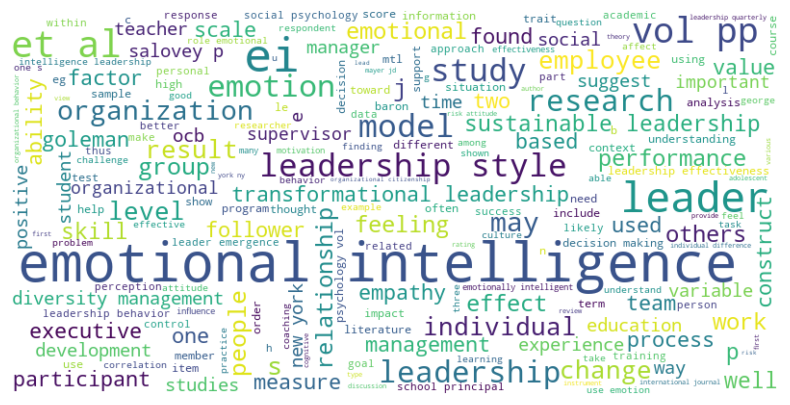

In [10]:
# Generate and display the word cloud
generate_word_cloud(cleaned_text)

In [13]:
from collections import Counter

In [14]:
# Function to list the most common words
def get_most_common_words(text, num_common=10):
    # Split the cleaned text into words
    words = text.split()
    
    # Use Counter to count the word frequencies
    word_counts = Counter(words)
    
    # Get the most common words
    most_common_words = word_counts.most_common(num_common)
    
    return most_common_words

# Get and print the most common words with frequencies
most_common_words = get_most_common_words(cleaned_text, num_common=10)
print("Most Common Words with Frequencies:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Most Common Words with Frequencies:
leadership: 1233
emotional: 1061
intelligence: 910
ei: 767
emotions: 503
pp: 420
vol: 415
leaders: 402
al: 387
et: 380


In [15]:
import matplotlib.pyplot as plt
from collections import Counter

In [23]:
# Function to list the most common words
def get_most_common_words(text, num_common=10):
    # Split the cleaned text into words
    words = text.split()
    # Use Counter to count the word frequencies
    word_counts = Counter(words)
    # Get the most common words
    most_common_words = word_counts.most_common(num_common)
    
    return most_common_words
    # Function to plot most common words
def plot_most_common_words(most_common_words):
    words, frequencies = zip(*most_common_words)  # Unzip the words and their frequencies
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')
    
    plt.title('Most Common Words', fontsize=16)
    plt.xlabel('Words', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45)
    
    plt.show()
    
    

Most Common Words with Frequencies:
leadership: 1233
emotional: 1061
intelligence: 910
ei: 767
emotions: 503
pp: 420
vol: 415
leaders: 402
al: 387
et: 380


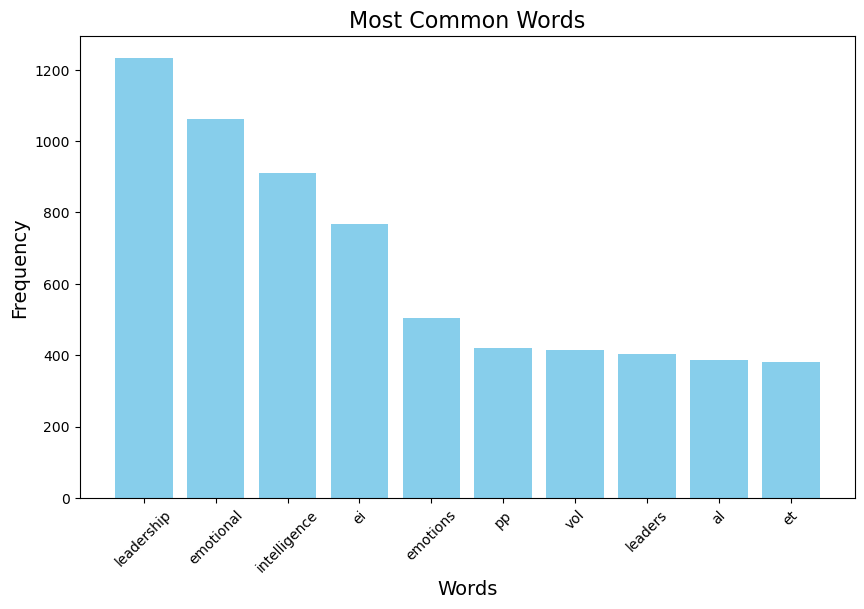

In [24]:
# Get and print the most common words with frequencies
most_common_words = get_most_common_words(cleaned_text, num_common=10)
print("Most Common Words with Frequencies:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

# Plot the most common words
plot_most_common_words(most_common_words)